# Raw Data Exploratory Analysis

This notebooks is used to quickly eplore the given raw data to better understand the format.

In [15]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [16]:
activity_pdf = pd.read_csv("../data/analytics_engineering_task.csv")
activity_pdf.describe()

,ORGANIZATION_ID,ACTIVITY_NAME,ACTIVITY_DETAIL,TIMESTAMP
count,72020,72020,1592,72020
unique,931,5,4,32924
top,33f0b98a557961f5ccc519bb972d450f,Shift.Created,absence-accounts,2024-03-20 14:13:27.517 Z
freq,7160,60534,543,6624


In [17]:
df = activity_pdf.copy()

In [18]:
activity_pdf.isnull().sum()

ORGANIZATION_ID        0
ACTIVITY_NAME          0
ACTIVITY_DETAIL    70428
TIMESTAMP              0
dtype: int64

In [19]:
print("\nTimestamp Range:")
print(f"{df['TIMESTAMP'].min()} --- {df['TIMESTAMP'].max()}")


Timestamp Range:
2024-01-01 20:20:05.197 Z --- 2024-04-28 11:02:47.580 Z


In [20]:
#Number of unique organizations
unique_orgs = df['ORGANIZATION_ID'].nunique()
print(f"\nNumber of unique organizations: {unique_orgs}")


Number of unique organizations: 931


In [21]:
#Most common activities
top_activities = df['ACTIVITY_NAME'].value_counts().head(5)
print("\nMost common activities:")
print(top_activities)


Most common activities:
ACTIVITY_NAME
Shift.Created                         60534
PunchClock.PunchedIn                   4583
PunchClock.Approvals.EntryApproved     2824
Hr.Employee.Invited                    2487
Page.Viewed                            1592
Name: count, dtype: int64


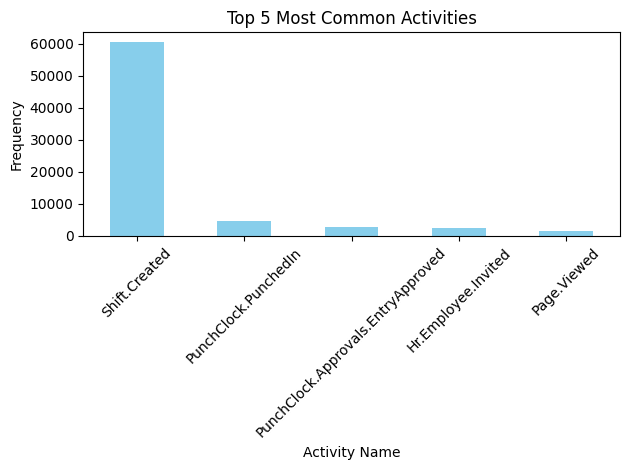

In [22]:
# e) Visualize the top activities
top_activities.plot(kind='bar', title='Top 5 Most Common Activities', color='skyblue')
plt.xlabel('Activity Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
 df['ACTIVITY_DETAIL'].value_counts()

ACTIVITY_DETAIL
absence-accounts         543
availability             532
integrations-overview    297
revenue                  220
Name: count, dtype: int64

In [24]:
 df[df["ACTIVITY_NAME"] != "Page.Viewed"]['ACTIVITY_DETAIL'].value_counts()

Series([], Name: count, dtype: int64)

In [25]:
#Find the organization with the most activity
top_org = df['ORGANIZATION_ID'].value_counts().idxmax()
print(f"\nOrganization with the most activity: {top_org}")


Organization with the most activity: 33f0b98a557961f5ccc519bb972d450f


In [26]:
most_active = df[df['ORGANIZATION_ID'] == "3f14a47847fb42bbc7dc119e7e1ef588"]
most_active['ACTIVITY_NAME'].value_counts()

ACTIVITY_NAME
PunchClock.PunchedIn                  127
Shift.Created                         110
PunchClock.Approvals.EntryApproved    100
Page.Viewed                             6
Hr.Employee.Invited                     5
Name: count, dtype: int64

In [27]:
most_active

,ORGANIZATION_ID,ACTIVITY_NAME,ACTIVITY_DETAIL,TIMESTAMP
67287,3f14a47847fb42bbc7dc119e7e1ef588,PunchClock.PunchedIn,NaN,2024-01-03 22:08:05.000 Z
67288,3f14a47847fb42bbc7dc119e7e1ef588,PunchClock.Approvals.EntryApproved,NaN,2024-01-15 22:48:58.000 Z
67289,3f14a47847fb42bbc7dc119e7e1ef588,PunchClock.PunchedIn,NaN,2024-01-03 22:25:05.000 Z
67290,3f14a47847fb42bbc7dc119e7e1ef588,PunchClock.PunchedIn,NaN,2024-01-31 13:13:26.000 Z
67291,3f14a47847fb42bbc7dc119e7e1ef588,Shift.Created,NaN,2024-01-14 20:56:24.513 Z
...,...,...,...,...
67630,3f14a47847fb42bbc7dc119e7e1ef588,Shift.Created,NaN,2024-01-25 18:29:45.170 Z
67631,3f14a47847fb42bbc7dc119e7e1ef588,PunchClock.PunchedIn,NaN,2024-01-10 07:10:05.000 Z
67632,3f14a47847fb42bbc7dc119e7e1ef588,PunchClock.Approvals.EntryApproved,NaN,2024-01-23 21:29:30.000 Z
67633,3f14a47847fb42bbc7dc119e7e1ef588,PunchClock.PunchedIn,NaN,2024-01-15 07:01:26.000 Z


In [28]:
grouped_count = df.groupby('ORGANIZATION_ID').agg({'TIMESTAMP': ["max", "min"]})
grouped_count[grouped_count['TIMESTAMP']['max'] == grouped_count['TIMESTAMP']['min']]

TIMESTAMP  \
                                                        max   
ORGANIZATION_ID                                               
0021ac0e558f8f7047388e7523afd327  2024-02-23 03:09:38.000 Z   
0036e85dfef040accb2c0bbb0ff43fda  2024-02-20 16:58:48.000 Z   
007d48a2bc006e6eac0348c788d26dfd  2024-03-16 23:00:12.000 Z   
00dcb2411cfd2f3c9fb4cd35c3aacca1  2024-01-02 11:02:14.000 Z   
01340f81b6bf6cc7b30f16ab05abdc39  2024-01-26 15:48:55.000 Z   
...                                                     ...   
47237ad21227099e72023701ac25f341  2024-03-12 10:02:29.840 Z   
4726bc56d58b697b6306a9c9be9adfef  2024-03-05 15:31:59.000 Z   
47730246ce3d4c286df94b3bbeeb8bfe  2024-02-02 22:59:47.343 Z   
482d19d7790fc0b345f4d31a7843d9ae  2024-03-10 08:05:46.000 Z   
48c11b65fdf38b0eb8882f4b2d922a16  2024-02-15 21:57:58.437 Z   

                                                             
                                                        min  
ORGANIZATION_ID                                              
0021ac0e558f8f7047388e7523afd327  2024-02-23 03:09:38.000 Z  
0036e85dfef040accb2c0bbb0ff43fda  2024-02-20 16:58:48.000 Z  
007d48a2bc006e6eac0348c788d26dfd  2024-03-16 23:00:12.000 Z  
00dcb2411cfd2f3c9fb4cd35c3aacca1  2024-01-02 11:02:14.000 Z  
01340f81b6bf6cc7b30f16ab05abdc39  2024-01-26 15:48:55.000 Z  
...                                                     ...  
47237ad21227099e72023701ac25f341  2024-03-12 10:02:29.840 Z  
4726bc56d58b697b6306a9c9be9adfef  2024-03-05 15:31:59.000 Z  
47730246ce3d4c286df94b3bbeeb8bfe  2024-02-02 22:59:47.343 Z  
482d19d7790fc0b345f4d31a7843d9ae  2024-03-10 08:05:46.000 Z  
48c11b65fdf38b0eb8882f4b2d922a16  2024-02-15 21:57:58.437 Z  

[227 rows x 2 columns]